<a href="https://colab.research.google.com/github/BLRGoD/Econometrics_labs/blob/main/Econometrics_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
from scipy.stats import norm, kstest
import statsmodels.api as sm
from numpy import ones

In [ ]:
data=pd.read_excel(io='lab_1.xlsx', sheet_name='Лист2')
indep_var=data.drop(columns=['Y'])
indep_var.describe()

In [ ]:
nones=pd.DataFrame({'1':ones(indep_var.shape[0])})

X=nones.join(indep_var)

Y=data['Y']

model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     5.277
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.37e-05
Time:                        06:20:50   Log-Likelihood:                -185.06
No. Observations:                  87   AIC:                             390.1
Df Residuals:                      77   BIC:                             414.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             69.8970      3.636     19.225      0.000      62.657      77.137
X1             0.1578      0.046      3.465      0.001       0.067       0.249
X2          3.363e-05   2.12e-05      1.583      0.117   -8.67e-06    7.59e-05
X3             0.1032      0.072      1.431      0.156      -0.040       0.247
X4            -0.0270      0.084     -0.322      0.749      -0.194       0.140
X5            -0.0158      0.007     -2.404      0.019      -0.029      -0.003
X6            -0.0800      0.046     -1.728      0.088      -0.172       0.012
X7            -0.2541      0.090     -2.837      0.006      -0.432      -0.076
X8             0.0400      0.157      0.255      0.800      -0.273       0.353
X9            -0.0011      0.001     -1.923      0.058      -0.002    3.98e-05
==============================================================================
Omnibus:                       27.588   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.047
Skew:                           1.097   Prob(JB):                     1.24e-14
Kurtosis:                       6.586   Cond. No.                     6.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

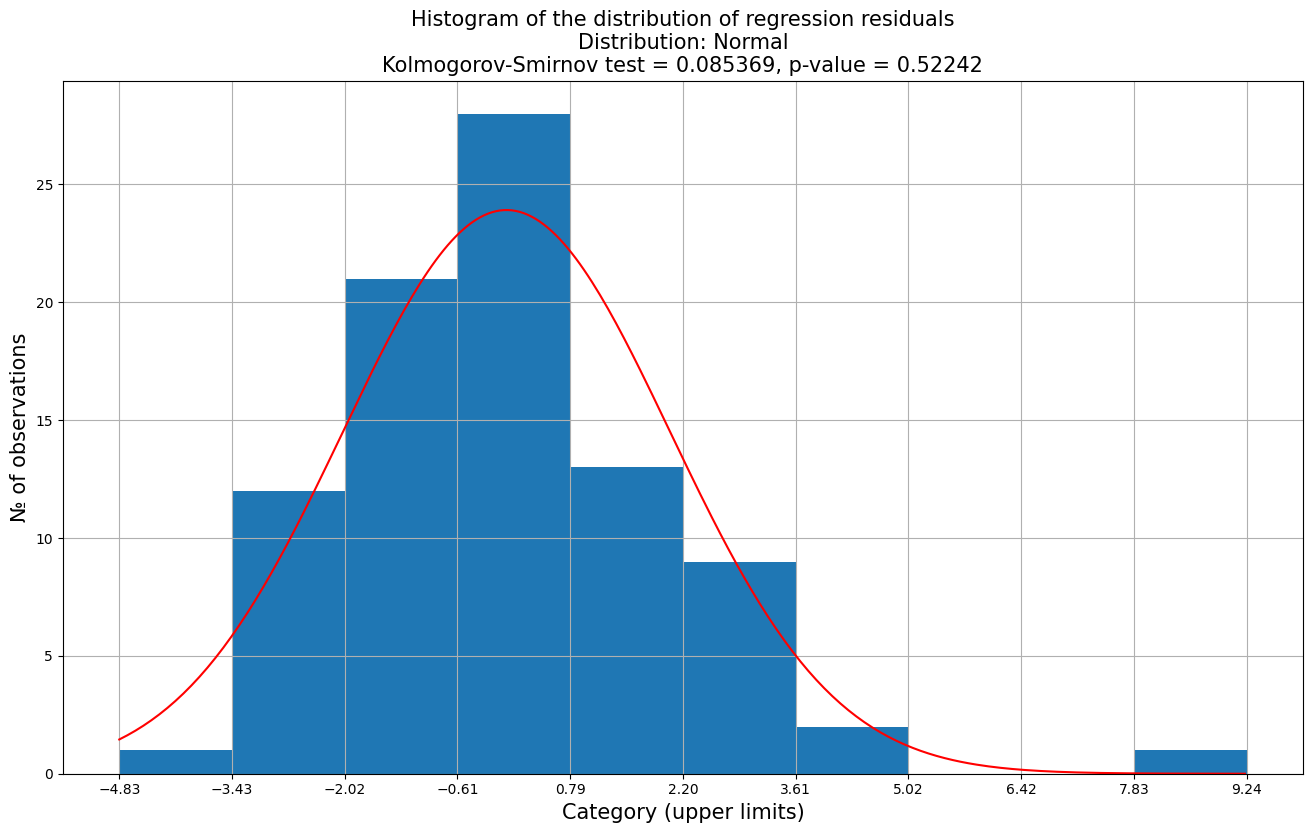

In [ ]:
plt.figure(figsize=(16, 9))
histData = plt.hist(model.resid)
range_ = arange(min(model.resid), max(model.resid), 0.05)
coefY = len(model.resid) * (histData[1][1] - histData[1][0])
plt.plot(range_, [norm(model.resid.mean(), model.resid.std()).pdf(x) * coefY for x in range_], color='r')
plt.xticks(histData[1])
plt.grid()
plt.xlabel("Category (upper limits)", fontsize=15)
plt.ylabel("№ of observations", fontsize=15)
KS_maxD, KS_PValue = kstest(model.resid, cdf='norm', args=(model.resid.mean(), model.resid.std()))
plt.title("Histogram of the distribution of regression residuals\n"+
          "Distribution: Normal\n"+
          "Kolmogorov-Smirnov test = {:.5}, p-value = {:.5}".format(KS_maxD, KS_PValue),fontsize=15)
plt.show()

In [ ]:
data.corr()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9
Y,1.000000,0.403235,-0.036363,0.113079,0.025336,-0.213136,-0.220285,-0.414588,0.057245,-0.148426
X1,0.403235,1.000000,-0.103898,0.018172,0.158276,-0.125203,-0.045059,-0.259985,0.168209,0.111352
X2,-0.036363,-0.103898,1.000000,-0.573667,0.180242,0.461126,0.081215,-0.110982,0.127677,-0.033779
X3,0.113079,0.018172,-0.573667,1.000000,-0.162524,-0.083245,-0.133427,-0.071580,-0.062864,0.205004
X4,0.025336,0.158276,0.180242,-0.162524,1.000000,-0.024368,0.060371,-0.056242,0.976489,0.061830
X5,-0.213136,-0.125203,0.461126,-0.083245,-0.024368,1.000000,0.011957,-0.035512,-0.032942,0.040127
X6,-0.220285,-0.045059,0.081215,-0.133427,0.060371,0.011957,1.000000,0.081163,0.017174,0.033168
X7,-0.414588,-0.259985,-0.110982,-0.071580,-0.056242,-0.035512,0.081163,1.000000,-0.077184,0.063504
X8,0.057245,0.168209,0.127677,-0.062864,0.976489,-0.032942,0.017174,-0.077184,1.000000,0.062498
X9,-0.148426,0.111352,-0.033779,0.205004,0.061830,0.040127,0.033168,0.063504,0.062498,1.000000


In [ ]:
import statsmodels.formula.api as sfa

variables = indep_var.columns.tolist()
for i in variables:
    print("R^2({}): {}".format(i, 
        sfa.ols(formula="{} ~ {}".format(i, ' + '
            .join(set(variables) - set([i]))), data=data).fit().rsquared))

R^2(X1): 0.1452601660498094
R^2(X2): 0.5445326869964762
R^2(X3): 0.5218280648210807
R^2(X4): 0.9652285824845759
R^2(X5): 0.27462563448192157
R^2(X6): 0.049606512715482665
R^2(X7): 0.14244944741488175
R^2(X8): 0.9644174638966427
R^2(X9): 0.10249085636313104


In [ ]:
from statsmodels.formula.api import ols
def forward_selected(data, response):
    """
    Данная функция позволяет устранить мультиколлениарность методом пошаговой регрессии с включением переменных.
    Параметры функции:
    ----------
    data : переменная типа pandas DataFrame со всеми возможными объясняющими и результативным признаками
    
    response: строка с названием результативного признака

    Фунция возвращает:
    ----------
    model: линейная модель множественной регрессии без мультиколлениарности
    """
    remaining = set(data.columns) 
    remaining.remove(response) 
    selected = [] 
    currentScore, bestNewScore = 0.0, 0.0 
    while remaining and currentScore == bestNewScore:
        scoresWithCandidates = [] 
        for candidate in remaining:
            score = ols(formula="{} ~ {}".format(response, " + ".join(selected + [candidate])), data=data).fit().rsquared_adj
            scoresWithCandidates.append((score, candidate))
        scoresWithCandidates.sort() 
        bestNewScore, bestCandidate = scoresWithCandidates.pop() 
        if currentScore < bestNewScore:
            remaining.remove(bestCandidate) 
            selected.append(bestCandidate) 
            currentScore = bestNewScore
    return ols(formula="{} ~ {}".format(response, " + ".join(sorted(selected))), data=data).fit()

forwardModel = forward_selected(data, "Y")
forwardModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     8.872
Date:                Mon, 15 May 2023   Prob (F-statistic):           9.49e-07
Time:                        06:23:51   Log-Likelihood:                -186.96
No. Observations:                  87   AIC:                             385.9
Df Residuals:                      81   BIC:                             400.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.4336      3.058     24.011      0.000      67.349      79.519
X1             0.1444      0.044      3.256      0.002       0.056       0.233
X5            -0.0111      0.006     -1.967      0.053      -0.022       0.000
X6            -0.0874      0.045     -1.935      0.056      -0.177       0.002
X7            -0.2938      0.086     -3.398      0.001      -0.466      -0.122
X9            -0.0009      0.001     -1.653      0.102      -0.002       0.000
==============================================================================
Omnibus:                       42.238   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.121
Skew:                           1.543   Prob(JB):                     1.86e-32
Kurtosis:                       8.549   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def backward_elimination(data, response):
    """
    Данная функция позволяет устранить мультиколлениарность методом пошаговой регрессии с исключением переменных.
    Параметры функции:
    ----------
    data : переменная типа pandas DataFrame со всеми возможными объясняющими и результативным признаками
    
    response: строка с названием результативного признака
    
    Фунция возвращает: 
    ----------
    model: линейная модель множественной регрессии без мультиколлениарности
    """
    selected = set(data.columns) 
    selected.remove(response) 
    currentPValues = ols(formula="{} ~ {}".format(response, " + ".join(selected)), data=data).fit().pvalues
    for _ in range(len(data.columns)): 
        currentAdjR2 = -1.0 
        if (max(currentPValues) >= 0.05):
            for i in range(1, len(currentPValues)):
                candidateToRemove = currentPValues.axes[0][i] 
                newModel = ols(formula="{} ~ {}".format(response, " + ".join(selected - set([candidateToRemove]))), data=data).fit()
                newAdjR2 = newModel.rsquared_adj 
                if (currentAdjR2 < newAdjR2):
                    currentAdjR2, deletedVar, improvedPValues = newAdjR2, candidateToRemove, newModel.pvalues
        if (currentAdjR2 == -1.0):
            break
        selected.remove(deletedVar) 
        currentPValues = improvedPValues
    return ols(formula="{} ~ {}".format(response, " + ".join(sorted(selected))), data=data). fit()

backwardModel = backward_elimination(data, "Y")
backwardModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     11.89
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.49e-06
Time:                        06:25:53   Log-Likelihood:                -190.41
No. Observations:                  87   AIC:                             388.8
Df Residuals:                      83   BIC:                             398.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.1918      1.276     53.456      0.000      65.655      70.729
X1             0.1361      0.045      3.016      0.003       0.046       0.226
X5            -0.0118      0.006     -2.039      0.045      -0.023      -0.000
X7            -0.3203      0.088     -3.630      0.000      -0.496      -0.145
==============================================================================
Omnibus:                       45.649   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.989
Skew:                           1.610   Prob(JB):                     4.10e-41
Kurtosis:                       9.398   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""